### With much thanks to Virgile Fritsch <virgile.fritsch@inria.fr> for getting me started with [http://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_housing.html](http://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_housing.html)

In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Enable inline plotting - comment out and re-run to get some plots with useful interaction
%matplotlib inline

In [2]:
# Define "classifiers" to be used.  Should do some further experimentation with the parameters 'contamination',
# 'nu' and 'gamma'

classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.,
                                             contamination=0.261),
    "Robust Covariance (Minimum Covariance Determinant)":
    EllipticEnvelope(contamination=0.261),
    "OCSVM": OneClassSVM(nu=0.261, gamma=0.05)}
colors = ['m', 'g', 'b']
legend1 = {}

In [3]:
Location = r'C:\Users\Kaz\OneDrive\FICO\power1000\power1000.csv'
Location = r'C:\Users\Kaz\OneDrive\FICO\power100K\samplepower2_100k.csv'
df = pd.read_csv(Location, header=0, index_col='TimestampUTC', parse_dates=True, dayfirst=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99999 entries, 2015-03-01 01:00:00 to 2015-08-26 01:15:00
Data columns (total 58 columns):
Meter                                                      99999 non-null object
LocalTimeStamp                                             99999 non-null object
ActivePower                                                98428 non-null float64
ApparentPower                                              98411 non-null float64
ReactivePower                                              98411 non-null float64
ActivePowerMean                                            0 non-null float64
ApparentPowerMean                                          0 non-null float64
ReactivePowerMean                                          0 non-null float64
ActivePowerSlidingWindowDemandDelivered_Received           98411 non-null float64
ApparentPowerSlidingWindowDemandDelivered_and_Received     98411 non-null float64
ReactivePowerSlidingWindowDemandDelivered_Received

In [5]:
df.head()

,Meter,LocalTimeStamp,ActivePower,ApparentPower,ReactivePower,ActivePowerMean,ApparentPowerMean,ReactivePowerMean,ActivePowerSlidingWindowDemandDelivered_Received,ApparentPowerSlidingWindowDemandDelivered_and_Received,...,CurrentUnbalanceMean,PowerFactorSigned,PowerFactorUnsigned,PowerFactorMean,VoltageTotalHarmonicDistortionMeanonInputV1,VoltageTotalHarmonicDistortionMeanonInputV2,VoltageTotalHarmonicDistortionMeanonInputV3,CurrentTotalHarmonicDistortionPhaseAMean,CurrentTotalHarmonicDistortionPhaseBMean,CurrentTotalHarmonicDistortionPhaseCMean
TimestampUTC,,,,,,,,,,,,,,,,,,,,,
2015-03-01 01:00:00,AH_BB34.BB_AH12_4,2015-03-01 12:00:00.0,2.258378,2.266474,0.341068,NaN,NaN,NaN,2.206607,2.229658,...,NaN,NaN,0.988613,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01 01:15:00,AH_BB34.BB_AH12_4,2015-03-01 12:15:00.0,2.137901,2.315815,0.377843,NaN,NaN,NaN,2.202845,2.225894,...,NaN,NaN,0.986600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01 01:30:00,AH_BB34.BB_AH12_4,2015-03-01 12:30:00.0,2.159653,2.206704,0.369738,NaN,NaN,NaN,2.202088,2.226025,...,NaN,NaN,0.985863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01 01:45:00,AH_BB34.BB_AH12_4,2015-03-01 12:45:00.0,2.274856,2.231020,0.295118,NaN,NaN,NaN,2.205782,2.230594,...,NaN,NaN,0.991213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01 02:00:00,AH_BB34.BB_AH12_4,2015-03-01 01:00:00.0,2.298314,2.310940,0.328133,NaN,NaN,NaN,2.207844,2.232934,...,NaN,NaN,0.989868,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,Meter,LocalTimeStamp,ActivePower,ApparentPower,ReactivePower,ActivePowerMean,ApparentPowerMean,ReactivePowerMean,ActivePowerSlidingWindowDemandDelivered_Received,ApparentPowerSlidingWindowDemandDelivered_and_Received,...,CurrentUnbalanceMean,PowerFactorSigned,PowerFactorUnsigned,PowerFactorMean,VoltageTotalHarmonicDistortionMeanonInputV1,VoltageTotalHarmonicDistortionMeanonInputV2,VoltageTotalHarmonicDistortionMeanonInputV3,CurrentTotalHarmonicDistortionPhaseAMean,CurrentTotalHarmonicDistortionPhaseBMean,CurrentTotalHarmonicDistortionPhaseCMean
TimestampUTC,,,,,,,,,,,,,,,,,,,,,
2015-08-26 12:15:00,AH_BB34.BB_AH12_7,2015-08-25 11:15:00.0,3.391812,3.474636,-1.186253,NaN,NaN,NaN,3.292495,3.500634,...,NaN,NaN,0.939917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-26 12:30:00,AH_BB34.BB_AH12_7,2015-08-25 11:30:00.0,3.322843,3.611355,-1.105425,NaN,NaN,NaN,3.366809,3.555352,...,NaN,NaN,0.952000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-26 12:45:00,AH_BB34.BB_AH12_7,2015-08-25 11:45:00.0,3.178917,3.450083,-1.151919,NaN,NaN,NaN,3.292208,3.498610,...,NaN,NaN,0.942615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-26 01:00:00,AH_BB34.BB_AH12_7,2015-08-26 12:00:00.0,3.277476,3.484119,-1.212679,NaN,NaN,NaN,3.293953,3.499283,...,NaN,NaN,0.937473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-26 01:15:00,AH_BB34.BB_AH12_7,2015-08-26 12:15:00.0,3.418118,3.431472,-1.147527,NaN,NaN,NaN,3.405930,3.579612,...,NaN,NaN,0.942427,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,ActivePower,ApparentPower,ReactivePower,ActivePowerMean,ApparentPowerMean,ReactivePowerMean,ActivePowerSlidingWindowDemandDelivered_Received,ApparentPowerSlidingWindowDemandDelivered_and_Received,ReactivePowerSlidingWindowDemandDelivered_Received,ActivePowerPhaseA,...,CurrentUnbalanceMean,PowerFactorSigned,PowerFactorUnsigned,PowerFactorMean,VoltageTotalHarmonicDistortionMeanonInputV1,VoltageTotalHarmonicDistortionMeanonInputV2,VoltageTotalHarmonicDistortionMeanonInputV3,CurrentTotalHarmonicDistortionPhaseAMean,CurrentTotalHarmonicDistortionPhaseBMean,CurrentTotalHarmonicDistortionPhaseCMean
count,98428.000000,98411.000000,98411.000000,0,0,0,98411.000000,98411.000000,98411.000000,98411.000000,...,0,0,98411.000000,0,0,0,0,0,0,0
mean,1.341679,1.479178,-0.006421,NaN,NaN,NaN,1.341966,1.478531,-0.006416,0.524711,...,NaN,NaN,0.816223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.202697,1.261773,0.731441,NaN,NaN,NaN,1.201931,1.260708,0.723592,0.552726,...,NaN,NaN,0.131663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.070312,0.107791,-2.499948,NaN,NaN,NaN,0.083283,0.115959,-2.021294,0.000000,...,NaN,NaN,0.258974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.093932,0.133855,0.089182,NaN,NaN,NaN,0.090175,0.130884,0.090593,0.080916,...,NaN,NaN,0.697045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.618388,0.754352,0.329708,NaN,NaN,NaN,0.618132,0.748215,0.337490,0.097723,...,NaN,NaN,0.820364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.491842,2.562272,0.402588,NaN,NaN,NaN,2.493833,2.552033,0.401008,0.958569,...,NaN,NaN,0.984877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5.342753,6.506819,4.688029,NaN,NaN,NaN,6.193874,7.733609,4.616032,2.601327,...,NaN,NaN,0.998758,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In Derek's notes the fields chosen for analysis are: 'ActivePower', 'ReactivePower', 'ReactivePowerSlidingWindowDemandDelivered_Received', 'ActiveEnergyDelivered_Received', 'ReactiveEnergyDelivered', 'AverageVoltageLinetoLine', 'AverageVoltageLinetoNeutral', 'Frequency', 'CurrentPhaseAverage', 'PowerFactorUnsigned' and 'CurrentTotalHarmonicDistortionPhaseAMean'.

'TimestampUTC' is taken as an index

You will note, however, that for this relatively small sample many of these fields do not contain any useful values, so this list is pruned to leave populated fields only.

When the full data become available we will revert to the original list of selected fields.

In [8]:
fieldsToUse = np.array([2, 4, 10, 18, 30, 38, 40, 43, 46, 50, 55])
dfSelected = df[fieldsToUse[:]]
dfSelected.describe()

,ActivePower,ReactivePower,ReactivePowerSlidingWindowDemandDelivered_Received,ActiveEnergyDelivered_Received,ReactiveEnergyDelivered,AverageVoltageLinetoLine,AverageVoltageLinetoNeutral,Frequency,CurrentPhaseAverage,PowerFactorUnsigned,CurrentTotalHarmonicDistortionPhaseAMean
count,98428.000000,98411.000000,98411.000000,0,0,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,0
mean,1.341679,-0.006421,-0.006416,NaN,NaN,429.902206,248.209137,50.004870,2.150488,0.816223,NaN
std,1.202697,0.731441,0.723592,NaN,NaN,2.583277,1.491533,0.054741,1.849868,0.131663,NaN
min,0.070312,-2.499948,-2.021294,NaN,NaN,414.670532,239.344086,49.689293,0.149623,0.258974,NaN
25%,0.093932,0.089182,0.090593,NaN,NaN,428.166870,247.204529,49.965805,0.179615,0.697045,NaN
50%,0.618388,0.329708,0.337490,NaN,NaN,430.039307,248.286926,50.001331,1.013122,0.820364,NaN
75%,2.491842,0.402588,0.401008,NaN,NaN,431.714233,249.255249,50.041935,3.888933,0.984877,NaN
max,5.342753,4.688029,4.616032,NaN,NaN,441.044922,254.493835,50.269814,8.817084,0.998758,NaN


Here we will apply the ``` dropna() ``` function.

Always worth trying to understand why the **```NaN```**s occur.

In [9]:
fieldsToUse = np.array([2, 4, 10, 38, 40, 43, 46, 50])
dfSelected = df[fieldsToUse[:]].dropna()
dfSelected.describe()

,ActivePower,ReactivePower,ReactivePowerSlidingWindowDemandDelivered_Received,AverageVoltageLinetoLine,AverageVoltageLinetoNeutral,Frequency,CurrentPhaseAverage,PowerFactorUnsigned
count,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000
mean,1.341715,-0.006421,-0.006416,429.902206,248.209137,50.004870,2.150488,0.816223
std,1.202715,0.731441,0.723592,2.583277,1.491533,0.054741,1.849868,0.131663
min,0.070312,-2.499948,-2.021294,414.670532,239.344086,49.689293,0.149623,0.258974
25%,0.093931,0.089182,0.090593,428.166870,247.204529,49.965805,0.179615,0.697045
50%,0.618394,0.329708,0.337490,430.039307,248.286926,50.001331,1.013122,0.820364
75%,2.491886,0.402588,0.401008,431.714233,249.255249,50.041935,3.888933,0.984877
max,5.342753,4.688029,4.616032,441.044922,254.493835,50.269814,8.817084,0.998758


Expand out the datetime index.  This may give some insight as to why the outliers exist.

In [10]:
days = np.array(['Monday', 'Tuesday', 'Wednesday', 
                 'Thursday', 'Friday', 'Saturday', 
                 'Sunday'])
dfSelected['Weekday'] = days[dfSelected.index.weekday]
weekend = np.array([False, False, False, 
                    False, False, True, 
                    True])
dfSelected['Weekend'] = weekend[dfSelected.index.weekday]
months = np.array(['Jan', 'Feb', 'Mar', 
                   'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 
                   'Oct', 'Nov', 'Dec'])
dfSelected['Month'] = months[dfSelected.index.month-1]
# dfSelected['Month']
dfSelected['DayOfMonth'] = dfSelected.index.day
# dfSelected['DayOfMonth']
dfSelected['WeekOfYear'] = dfSelected.index.week
dfSelected['Year'] = dfSelected.index.year
dfSelected['Quarter'] = dfSelected.index.quarter
dfSelected['Hour'] = dfSelected.index.hour
dfSelected['Minute'] = dfSelected.index.minute
# dfSelected.index.minute
dfSelected.describe()

,ActivePower,ReactivePower,ReactivePowerSlidingWindowDemandDelivered_Received,AverageVoltageLinetoLine,AverageVoltageLinetoNeutral,Frequency,CurrentPhaseAverage,PowerFactorUnsigned,Weekend,DayOfMonth,WeekOfYear,Year,Quarter,Hour,Minute
count,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,98411,98411.000000,98411.000000,98411,98411.000000,98411.000000,98411.000000
mean,1.341715,-0.006421,-0.006416,429.902206,248.209137,50.004870,2.150488,0.816223,0.286269,15.529738,29.073935,2015,2.650385,6.499649,22.500229
std,1.202715,0.731441,0.723592,2.583277,1.491533,0.054741,1.849868,0.131663,0.452019,8.790740,12.068899,0,0.946668,3.454038,16.770663
min,0.070312,-2.499948,-2.021294,414.670532,239.344086,49.689293,0.149623,0.258974,False,1.000000,9.000000,2015,1.000000,1.000000,0.000000
25%,0.093931,0.089182,0.090593,428.166870,247.204529,49.965805,0.179615,0.697045,0,8.000000,19.000000,2015,2.000000,3.000000,15.000000
50%,0.618394,0.329708,0.337490,430.039307,248.286926,50.001331,1.013122,0.820364,0,16.000000,28.000000,2015,3.000000,7.000000,15.000000
75%,2.491886,0.402588,0.401008,431.714233,249.255249,50.041935,3.888933,0.984877,1,23.000000,39.000000,2015,3.000000,10.000000,45.000000
max,5.342753,4.688029,4.616032,441.044922,254.493835,50.269814,8.817084,0.998758,True,31.000000,52.000000,2015,4.000000,12.000000,45.000000


##### The following cell is for some diagnostics / sandpit:

In [11]:
X3 = dfSelected.values[:, [2, 5]]
X3
delta0 = max(X3[:,0])-min(X3[:,0])
delta0
delta1 = max(X3[:,1])-min(X3[:,1])
delta1
np.mean(X3[:,0])
dfSelected.columns.values[2]
#plt.figure(1)
#plt.scatter(X3[:, 0], X3[:, 1], color='red')
np.percentile(X3[:, 0],[25,50,75])
#np.percentile(X3[:, 0],75)
(x1,x2,y1,y2)=(2,3,4,5)
df[df.columns.values[2]+'_Upper_Outliers'] = 0.5*(1+np.sign(df[df.columns.values[2]]-2.7))
#df[df.columns.values[2]+'_Upper_Outliers']
np.mean(X3[:, 1])

50.00487004748434

The following four subroutines provide what's necessary to effect quadratic discriminants and to plot them.

These discriminats are defined by root locations -a and a and the y-axis intercept c <= 0.

The boundary is given by: a^2*x2/c - x1^2 + a^2 = 0

a and c are determined from locations chosen manually so as to separate off outliers as revealed by scatter plots.  A translation and rotation (also determined from the same locations chosen manually) is used on the raw data before being applied to the quadratic decision boundary.

In [12]:
def euclidean(x1,y1,x2,y2):
    
    dx = x2-x1
    dy = y2-y1
    
    return math.sqrt(dx * dx + dy * dy)

def quadParams(x1,y1,x2,y2,x3,y3):
    
    a = 0.5*euclidean(x1,y1,x2,y2)
    
    xSub = (x1+x2)/2.0
    ySub = (y1+y2)/2.0
    
    xyAngle = math.atan2(y2-y1, x2-x1)
    
    c = euclidean(x2,y2,x3,y3)*math.sin(math.atan2(y2-y3, x2-x3)-xyAngle)
    
    xyRotate = [[np.cos(xyAngle), -np.sin(xyAngle)], [np.sin(xyAngle), np.cos(xyAngle)]]
    
    return(xSub, ySub, xyRotate, a, c)

def quadDiscrim(x,y,xSub, ySub, xyRotate, a, c):
    
    #print(xyRotate)
    ([xd,yd]) = np.dot([x - xSub,y - ySub],xyRotate)
    
    return((a*a*yd/c)-(xd*xd)+(a*a))

def quadPlot(reach, xSub, ySub, xyRotate, a, c):
    
    #  draw the graph
    # create a list of 2-tuples like (x, y)
    start = -a * reach
    step = a / 10.0
    stop = (a * reach) + (step / 2.0)
    XQd = [(xd, ((xd*xd)-(a*a))*(c/(a*a))) for xd in np.arange(start, stop, step)]
    XQ = np.add(np.dot(XQd,np.transpose(xyRotate)),(xSub,ySub))

    return(XQ)


#### Run the 2-dimensional Plotting
In this version the covariance and SVM contours are switched off to leave univariate outlier boundaries as defined using box-plots: UQ + (1.5*IQR) or LQ - (1.5*IQR).

Quadratic outlier boundaries have been applied to most figures.  New flags have been added to the database indicating the outliers separated off in each of the figures.  These appear in the summary statistics which follow the graphs.

Computing for fields 'ActivePower' and 'ReactivePower'
Computing for fields 'ActivePower' and 'ReactivePowerSlidingWindowDemandDelivered_Received'
Computing for fields 'ActivePower' and 'AverageVoltageLinetoLine'
Computing for fields 'ActivePower' and 'AverageVoltageLinetoNeutral'
Computing for fields 'ActivePower' and 'Frequency'
Computing for fields 'ActivePower' and 'CurrentPhaseAverage'
Computing for fields 'ActivePower' and 'PowerFactorUnsigned'
------
Computing for fields 'ReactivePower' and 'ReactivePowerSlidingWindowDemandDelivered_Received'
Computing for fields 'ReactivePower' and 'AverageVoltageLinetoLine'
Computing for fields 'ReactivePower' and 'AverageVoltageLinetoNeutral'
Computing for fields 'ReactivePower' and 'Frequency'
Computing for fields 'ReactivePower' and 'CurrentPhaseAverage'
Computing for fields 'ReactivePower' and 'PowerFactorUnsigned'
------
Computing for fields 'ReactivePowerSlidingWindowDemandDelivered_Received' and 'AverageVoltageLinetoLine'
Computing for 

C:\Users\Kaz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Computing for fields 'AverageVoltageLinetoLine' and 'PowerFactorUnsigned'
------
Computing for fields 'AverageVoltageLinetoNeutral' and 'Frequency'
Computing for fields 'AverageVoltageLinetoNeutral' and 'CurrentPhaseAverage'
Computing for fields 'AverageVoltageLinetoNeutral' and 'PowerFactorUnsigned'
------
Computing for fields 'Frequency' and 'CurrentPhaseAverage'
Computing for fields 'Frequency' and 'PowerFactorUnsigned'
------
Computing for fields 'CurrentPhaseAverage' and 'PowerFactorUnsigned'
------
------


C:\Users\Kaz\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


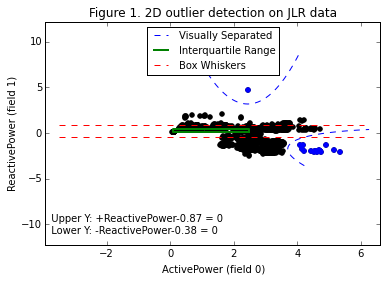

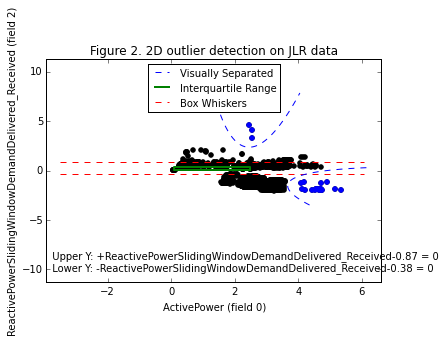

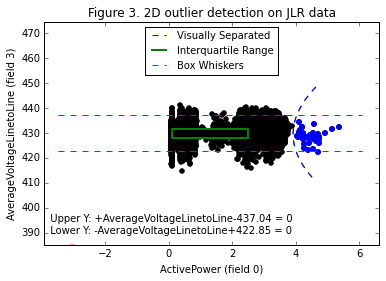

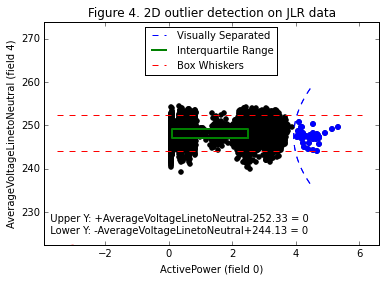

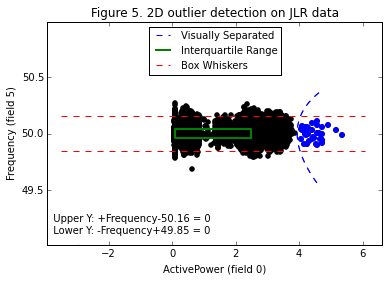

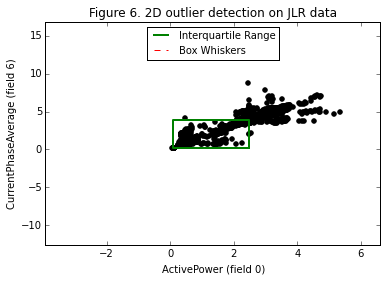

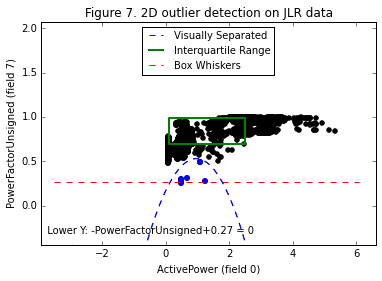

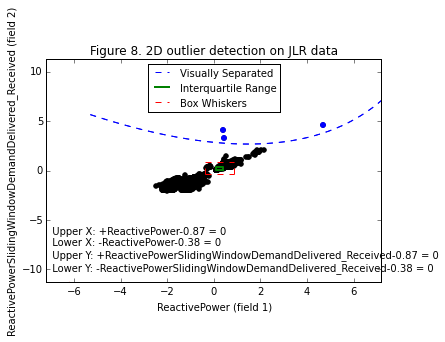

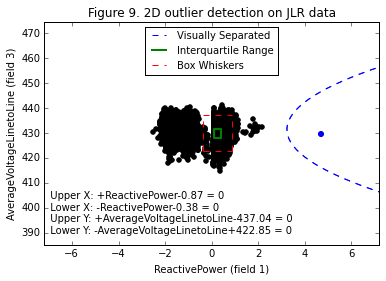

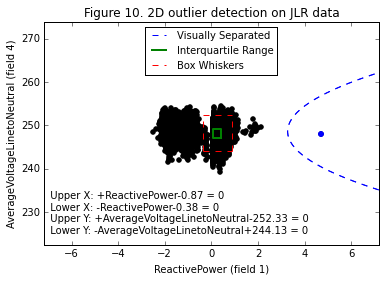

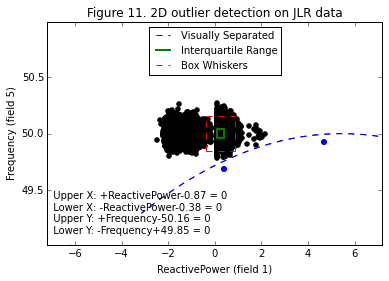

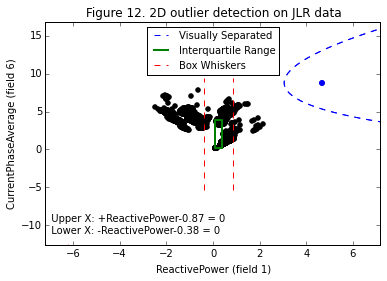

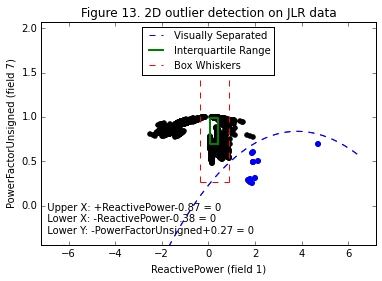

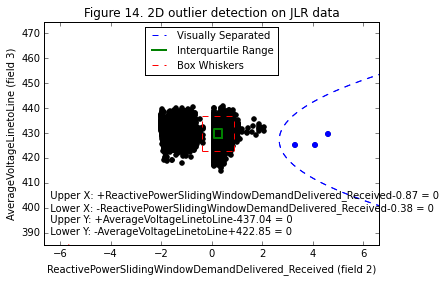

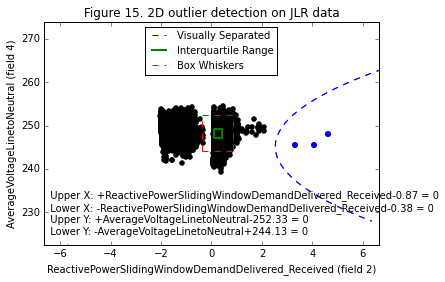

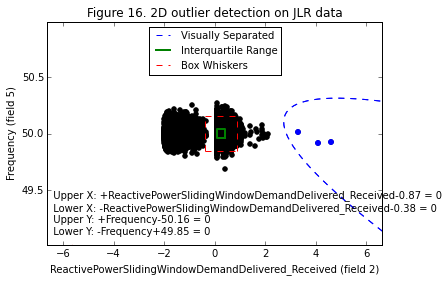

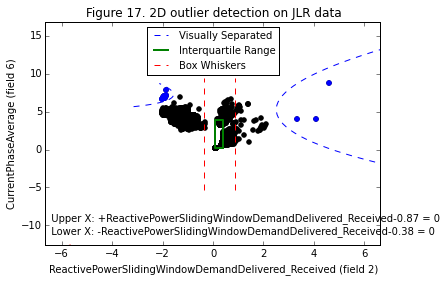

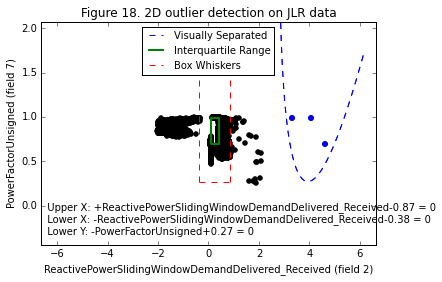

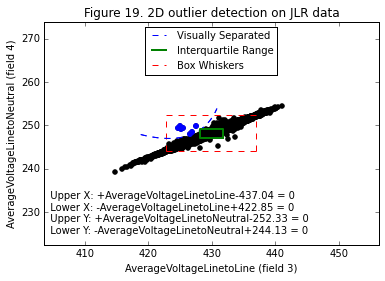

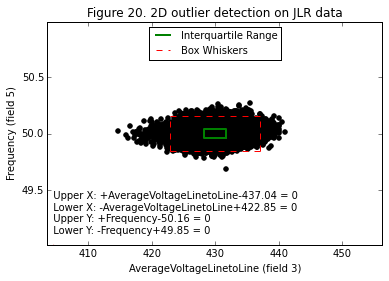

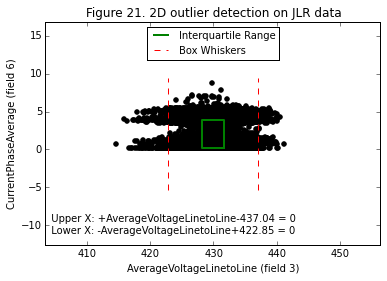

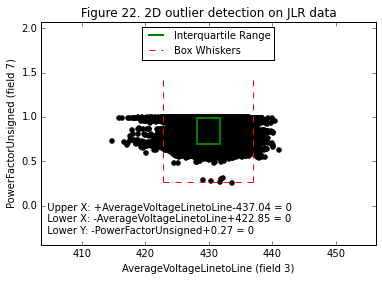

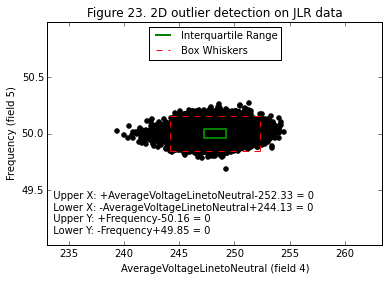

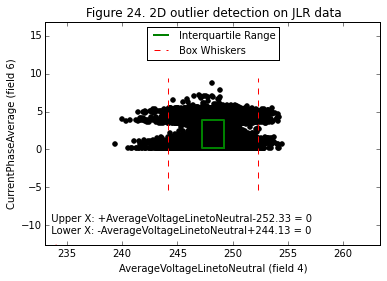

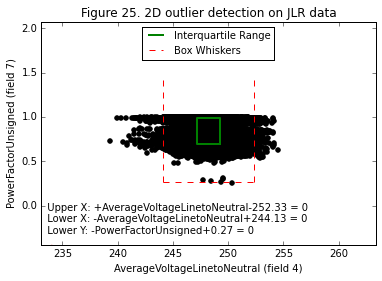

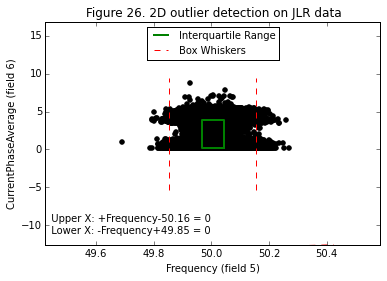

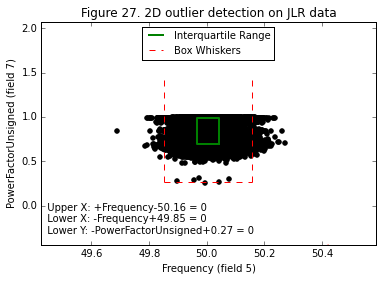

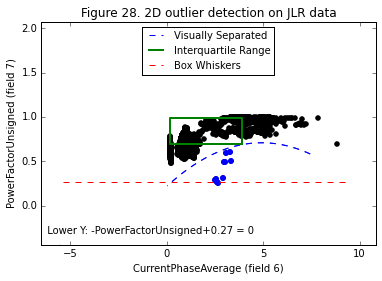

In [13]:
figNumber = 1   # initialise graph/figure count
contourMapResolution = 500
for i in range(0,len(fieldsToUse)):
    for j in range(i+1,len(fieldsToUse)):
        X3 = dfSelected.values[:, [i, j]]    # Get data
        if ((max(X3[:,0])-min(X3[:,0])<0.000001) or (max(X3[:,1])-min(X3[:,1])<0.000001)):
            print("One Dimensional")
        else:
            if ((i >= 0) and (j >= 1)):
                print("Computing for fields \'"+dfSelected.columns.values[i]+"\' and \'"+dfSelected.columns.values[j]+"\'")
                min0 = min(X3[:,0])
                max0 = max(X3[:,0])
                min1 = min(X3[:,1])
                max1 = max(X3[:,1])
                delta0 = max0-min0
                delta1 = max1-min1
                if (delta0 > delta1):
                    delta = delta0
                else:
                    delta = delta1
                newMin0 = np.mean(X3[:,0])-delta0
                newMin1 = np.mean(X3[:,1])-(1.7*delta1)   # extra head room for threshold equations
                newMax0 = np.mean(X3[:,0])+delta0
                newMax1 = np.mean(X3[:,1])+(1.7*delta1)   # extra head room for the legend
                #print("Lower plotting limit:",newMin0,newMin1)
                #print("Minima:",min(X3[:,0]),min(X3[:,1]))
                #print("Data:",X3[:,[0,1]])
                #print("Maxima:",max(X3[:,0]),max(X3[:,1]))
                #print("Upper plotting limit:",newMax0,newMax1)
                # Learn a frontier for outlier detection with several classifiers
                #xx, yy = np.meshgrid(np.linspace(newMin0, newMax0, contourMapResolution), np.linspace(newMin1, newMax1, contourMapResolution))
                plt.figure(figNumber)
                # for k, (clf_name, clf) in enumerate(classifiers.items()):
                    #print ("\tUsing " + clf_name)
                    #try:
                    #    clf.fit(X3)
                    #    Z3 = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
                    #    Z3 = Z3.reshape(xx.shape)
                    #except ValueError:
                    #    print ("\t\tWARNING:  Singular matrix.  Inserting a zero plane instead for fields \'"+dfSelected.columns.values[i]+"\' and \'"+dfSelected.columns.values[j]+"\'")
                    #    Z3 = np.zeros((contourMapResolution, contourMapResolution))
                    #legend1[clf_name] = plt.contour(xx, yy, Z3, levels=[0], linewidths=2, colors=colors[k])
                #legend1_values_list = list( legend1.values() )
                #legend1_keys_list = list( legend1.keys() )
                boxplotWhiskerExtender = 1.5  # is usually 1.5 * (uq0-lq0) but 1.8 * (uq0-lq0) seemed
                                              #   to yield a more reasonable number of outliers
                
                plt.scatter(X3[:, 0], X3[:, 1], color='black')
                lq0 = np.percentile(X3[:, 0],25)
                uq0 = np.percentile(X3[:, 0],75)
                lw0 = lq0 - (boxplotWhiskerExtender*(uq0-lq0))  
                uw0 = uq0 + (boxplotWhiskerExtender*(uq0-lq0))  
                lq1 = np.percentile(X3[:, 1],25)
                uq1 = np.percentile(X3[:, 1],75)
                lw1 = lq1 - (boxplotWhiskerExtender*(uq1-lq1))
                uw1 = uq1 + (boxplotWhiskerExtender*(uq1-lq1))
                annotateString = "  "   ###  for capturing univariate equations to split off outliers
                if (max0 > uw0):
                    annotateString = annotateString+"Upper X: +"+dfSelected.columns.values[i]+'{:+.2f}'.format(0.0-uw0)+" = 0\n  "
                    dfSelected[dfSelected.columns.values[i]+'_Uni_Upper_Outliers'] = X3[:, 0]-uw0
                    dfSelected[dfSelected.columns.values[i]+'_Uni_Upper_Outliers_FLAG'] = 0.5*(1.0+np.sign(X3[:, 0]-uw0))
                    #outliersu0 = np.where(X3[:, 0]>uw0)
                    #plt.scatter(X3[outliersu0, 0], X3[outliersu0, 1], color='red')
                    plt.plot([uw0,uw0],[lw1,uw1], linewidth=1, color='red', linestyle='dashed')
                if (min0 < lw0):
                    annotateString = annotateString+"Lower X: -"+dfSelected.columns.values[i]+'{:+.2f}'.format(lw0)+" = 0\n  "
                    dfSelected[dfSelected.columns.values[i]+'_Uni_Lower_Outliers'] = 0.0-X3[:, 0]+lw0
                    dfSelected[dfSelected.columns.values[i]+'_Uni_Lower_Outliers_FLAG'] = 0.5*(1.0+np.sign(0.0-X3[:, 0]+lw0))
                    #outliersl0 = np.where(X3[:, 0]<lw0)
                    #plt.scatter(X3[outliersl0, 0], X3[outliersl0, 1], color='red')
                    plt.plot([lw0,lw0],[lw1,uw1], linewidth=1, color='red', linestyle='dashed')
                if (max1 > uw1):
                    annotateString = annotateString+"Upper Y: +"+dfSelected.columns.values[j]+'{:+.2f}'.format(0.0-uw1)+" = 0\n  "
                    dfSelected[dfSelected.columns.values[j]+'_Uni_Upper_Outliers'] = X3[:, 1]-uw1
                    dfSelected[dfSelected.columns.values[j]+'_Uni_Upper_Outliers_FLAG'] = 0.5*(1.0+np.sign(X3[:, 1]-uw1))
                    #outliersu1 = np.where(X3[:, 1]>uw1)
                    #plt.scatter(X3[outliersu1, 0], X3[outliersu1, 1], color='red')
                    plt.plot([lw0,uw0],[uw1,uw1], linewidth=1, color='red', linestyle='dashed')
                if (min1 < lw1):
                    annotateString = annotateString+"Lower Y: -"+dfSelected.columns.values[j]+'{:+.2f}'.format(lw1)+" = 0\n  "
                    dfSelected[dfSelected.columns.values[j]+'_Uni_Lower_Outliers'] = 0.0-X3[:, 1]+lw1
                    dfSelected[dfSelected.columns.values[j]+'_Uni_Lower_Outliers_FLAG'] = 0.5*(1.0+np.sign(0.0-X3[:, 1]+lw1))
                    #outliersl1 = np.where(X3[:, 1]<lw1)
                    #plt.scatter(X3[outliersl1, 0], X3[outliersl1, 1], color='red')
                    plt.plot([lw0,uw0],[lw1,lw1], linewidth=1, color='red', linestyle='dashed')
                if (figNumber in ([1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,28])):
                    if (figNumber == 1):
                        (x1,y1,x2,y2,x3,y3)=(1.62,4.60,3.26,4.60,2.38,3.19)
                    if (figNumber == 2):
                        (x1,y1,x2,y2,x3,y3)=(3.72,-2.01,4.64,-0.12,3.90,-0.71)
                    if (figNumber == 3):
                        (x1,y1,x2,y2,x3,y3)=(4.09,439,4.09,420,3.91,430)
                    if (figNumber == 4):
                        (x1,y1,x2,y2,x3,y3)=(4.07,253,4.07,242,3.94,240)
                    if (figNumber == 5):
                        (x1,y1,x2,y2,x3,y3)=(4.12,50.2,4.09,49.8,3.94,50.0)
                    if (figNumber == 7):
                        (x1,y1,x2,y2,x3,y3)=(0.15,0.27,1.79,0.26,0.96,0.53)
                    if (figNumber == 8):
                        (x1,y1,x2,y2,x3,y3)=(-0.76,3.06,6.05,5.19,2.40,2.71)
                    if (figNumber == 9):
                        (x1,y1,x2,y2,x3,y3)=(4.40,445,4.72,416,3.24,430)
                    if (figNumber == 10):
                        (x1,y1,x2,y2,x3,y3)=(4.43,256,4.52,241,3.27,249)
                    if (figNumber == 11):
                        (x1,y1,x2,y2,x3,y3)=(5.79,50.0,-0.18,49.7,2.11,49.9)
                    if (figNumber == 12):
                        (x1,y1,x2,y2,x3,y3)=(3.85,11.7,5.56,4.62,3.38,6.93)
                    if (figNumber == 13):
                        (x1,y1,x2,y2,x3,y3)=(-0.09,0.20,4.25,0.83,1.70,0.66)
                    if (figNumber == 14):
                        (x1,y1,x2,y2,x3,y3)=(3.82,413,3.77,441,2.67,430)
                    if (figNumber == 15):
                        (x1,y1,x2,y2,x3,y3)=(3.82,255,3.39,237,2.59,248)
                    if (figNumber == 16):
                        (x1,y1,x2,y2,x3,y3)=(3.79,49.7,3.85,50.3,2.72,50.0)
                    if (figNumber == 17):
                        (x1,y1,x2,y2,x3,y3)=(3.40,8.86,4.22,0.61,2.70,3.00)
                    if (figNumber == 18):
                        (x1,y1,x2,y2,x3,y3)=(3.02,1.20,4.70,0.51,2.91,0.63)
                    if (figNumber == 19):
                        (x1,y1,x2,y2,x3,y3)=(423,247,429,250,427,248)
                    if (figNumber == 28):
                        (x1,y1,x2,y2,x3,y3)=(5.57,0.70,1.87,0.52,2.91,0.64)
                #    if (figNumber == 13):
                #        (x1,x2,y1,y2)=(0.19,0.724,1.00,0.969)
                #    if (figNumber == 18):
                #        (x1,x2,y1,y2)=(0.7,0.45,0.985,0.96)
                #    if (figNumber == 19):
                #        (x1,x2,y1,y2)=(420,438.6,243.8,254.3)
                #    if (figNumber == 28):
                #        (x1,x2,y1,y2)=(5.3,3.5,0.98,0.97)
                    qP = quadParams(x1,y1,x2,y2,x3,y3)
                    #quadDiscrim(0.0,0.0,*qP)
                    XQ = quadPlot(2.0,*qP)
                    plt.plot(XQ[:,0],XQ[:,1], linewidth=1, color='blue', linestyle='dashed', label='Visually Separated')
                    quadOut = np.array([quadDiscrim(X3[k,0],X3[k,1],*qP) for k in range(0,len(X3[:,0]))])
                    dfSelected[dfSelected.columns.values[i]+'_'+dfSelected.columns.values[i]+'_Quad_Outliers_r1'] = quadOut
                    dfSelected[dfSelected.columns.values[i]+'_'+dfSelected.columns.values[i]+'_Quad_Outliers_r1_FLAG'] = 0.5*(1.0+np.sign(quadOut))
                    outliers = np.where(quadOut[:] > 0.0)
                    plt.scatter(X3[outliers, 0], X3[outliers, 1], color='blue')
                    #  round 2
                    if (figNumber == 1):
                        (x1,y1,x2,y2,x3,y3)=(3.72,-2.05,4.74,-0.07,4.04,-0.60)
                    if (figNumber == 2):
                        (x1,y1,x2,y2,x3,y3)=(1.83,3.77,3.19,3.71,2.53,2.35)
                    if (figNumber == 17):
                        (x1,y1,x2,y2,x3,y3)=(-2.14,6.18,-1.63,7.71,-1.76,6.48)
                    qP = quadParams(x1,y1,x2,y2,x3,y3)
                    #quadDiscrim(0.0,0.0,*qP)
                    XQ = quadPlot(2.0,*qP)
                    plt.plot(XQ[:,0],XQ[:,1], linewidth=1, color='blue', linestyle='dashed')
                #    plt.plot([x1, x2], [y1, y2], color='blue')
                #    (dx,dy) = (x2-x1,y2-y1)
                #    cdx = ((y1*dx)-(x1*dy) + (y2*dx)-(x2*dy))/2.0
                #    (w2,w1,w0) = (dx,0-dy,0-cdx)
                #    annotateString = annotateString + "Bivariate:"+'{:+.2f}'.format(w1) + "." + dfSelected.columns.values[i] + "\n" \
                #                                    + "          "+'{:+.2f}'.format(w2) + "." + dfSelected.columns.values[j] + "\n" \
                #                                    + "          "+'{:+.2f}'.format(w0) + " = 0\n  "
                #    dfSelected[dfSelected.columns.values[i]+'_Bi_Lower_Outliers'] = (X3[:, 1]*w2)+(X3[:, 0]*w1)+w0
                #    dfSelected[dfSelected.columns.values[i]+'_Bi_Lower_Outliers_FLAG'] = 0.5*(1.0+np.sign((X3[:, 1]*w2)+(X3[:, 0]*w1)+w0))
                #    dfSelected[dfSelected.columns.values[j]+'_Bi_Lower_Outliers'] = dfSelected[dfSelected.columns.values[i]+'_Bi_Lower_Outliers']
                #    dfSelected[dfSelected.columns.values[j]+'_Bi_Lower_Outliers_FLAG'] = dfSelected[dfSelected.columns.values[i]+'_Bi_Lower_Outliers_FLAG']
                    
                    quadOut = np.array([quadDiscrim(X3[k,0],X3[k,1],*qP) for k in range(0,len(X3[:,0]))])
                    dfSelected[dfSelected.columns.values[i]+'_'+dfSelected.columns.values[i]+'_Quad_Outliers_r2'] = quadOut
                    dfSelected[dfSelected.columns.values[i]+'_'+dfSelected.columns.values[i]+'_Quad_Outliers_r2_FLAG'] = 0.5*(1.0+np.sign(quadOut))
                    outliers = np.where(quadOut[:] > 0.0)
                    plt.scatter(X3[outliers, 0], X3[outliers, 1], color='blue')
                plt.annotate(annotateString, xy=(lw0, lw1),
                             xycoords="data", textcoords="data",
                             xytext=(newMin0, newMin1))
                # Plot the results (= shape of the data points cloud)
                plt.title("Figure "+str(figNumber)+". 2D outlier detection on JLR data")
                #plt.xlim((xx.min(), xx.max()))
                #plt.ylim((yy.min(), yy.max()))
                plt.xlim((newMin0, newMax0))
                plt.ylim((newMin1, newMax1))
                xFieldLabel = dfSelected.columns.values[i]+" (field "+str(i)+")"
                yFieldLabel = dfSelected.columns.values[j]+" (field "+str(j)+")"
                plt.xlabel(xFieldLabel)
                plt.ylabel(yFieldLabel)
                plt.plot([uq0,uq0,lq0,lq0,uq0],[lq1,uq1,uq1,lq1,lq1], linewidth=2, color='green', linestyle='-', label='Interquartile Range')
                plt.plot([newMin0,newMin0+1],[newMin1-1,newMin1], linewidth=1, color='red', linestyle='dashed', label='Box Whiskers')
                legend1_values_list = list( legend1.values() )
                legend1_keys_list = list( legend1.keys() )
                #plt.legend((legend1_values_list[0].collections[0],
                #            legend1_values_list[1].collections[0],
                #            legend1_values_list[2].collections[0]),
                #           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
                #           loc="upper center",
                #           prop=matplotlib.font_manager.FontProperties(size=10))
                plt.legend(loc="upper center",
                           prop=matplotlib.font_manager.FontProperties(size=10))
                           
                figNumber += 1
    print("------")
plt.show()

New summary statistics

In [14]:
dfSelected.describe()

,ActivePower,ReactivePower,ReactivePowerSlidingWindowDemandDelivered_Received,AverageVoltageLinetoLine,AverageVoltageLinetoNeutral,Frequency,CurrentPhaseAverage,PowerFactorUnsigned,Weekend,DayOfMonth,...,ReactivePowerSlidingWindowDemandDelivered_Received_ReactivePowerSlidingWindowDemandDelivered_Received_Quad_Outliers_r2,ReactivePowerSlidingWindowDemandDelivered_Received_ReactivePowerSlidingWindowDemandDelivered_Received_Quad_Outliers_r2_FLAG,AverageVoltageLinetoLine_AverageVoltageLinetoLine_Quad_Outliers_r1,AverageVoltageLinetoLine_AverageVoltageLinetoLine_Quad_Outliers_r1_FLAG,AverageVoltageLinetoLine_AverageVoltageLinetoLine_Quad_Outliers_r2,AverageVoltageLinetoLine_AverageVoltageLinetoLine_Quad_Outliers_r2_FLAG,CurrentPhaseAverage_CurrentPhaseAverage_Quad_Outliers_r1,CurrentPhaseAverage_CurrentPhaseAverage_Quad_Outliers_r1_FLAG,CurrentPhaseAverage_CurrentPhaseAverage_Quad_Outliers_r2,CurrentPhaseAverage_CurrentPhaseAverage_Quad_Outliers_r2_FLAG
count,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,98411,98411.000000,...,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000,98411.000000
mean,1.341715,-0.006421,-0.006416,429.902206,248.209137,50.004870,2.150488,0.816223,0.286269,15.529738,...,-14.500827,0.000030,-34.112338,0.000071,-34.112338,0.000071,-16.397034,0.000112,-16.397034,0.000112
std,1.202715,0.731441,0.723592,2.583277,1.491533,0.054741,1.849868,0.131663,0.452019,8.790740,...,5.989180,0.005521,20.741852,0.008434,20.741852,0.008434,4.858342,0.010572,4.858342,0.010572
min,0.070312,-2.499948,-2.021294,414.670532,239.344086,49.689293,0.149623,0.258974,False,1.000000,...,-32.079963,0.000000,-266.353418,0.000000,-266.353418,0.000000,-26.075637,0.000000,-26.075637,0.000000
25%,0.093931,0.089182,0.090593,428.166870,247.204529,49.965805,0.179615,0.697045,0,8.000000,...,-13.212970,0.000000,-42.354182,0.000000,-42.354182,0.000000,-21.219358,0.000000,-21.219358,0.000000
50%,0.618394,0.329708,0.337490,430.039307,248.286926,50.001331,1.013122,0.820364,0,16.000000,...,-11.885052,0.000000,-27.163740,0.000000,-27.163740,0.000000,-15.464585,0.000000,-15.464585,0.000000
75%,2.491886,0.402588,0.401008,431.714233,249.255249,50.041935,3.888933,0.984877,1,23.000000,...,-11.269227,0.000000,-19.272418,0.000000,-19.272418,0.000000,-14.364068,0.000000,-14.364068,0.000000
max,5.342753,4.688029,4.616032,441.044922,254.493835,50.269814,8.817084,0.998758,True,31.000000,...,1.101995,1.000000,33.501651,1.000000,33.501651,1.000000,17.131576,1.000000,17.131576,1.000000


In [15]:
dfSelected.to_csv(r'C:\Users\Kaz\OneDrive\FICO\power1000\selected_power1000_with_outliers.csv')